## Generate static graphs

These are the input parameters for the notebook. They will be automatically changed when the scripts to generate monthly statistics are run. You can modify them manually to generate multiple plots locally as well.

Pass in `None` to remove the filters and plot all data. This is not recommended for production settings, but might be useful for reports based on data snapshots.

In [1]:
year = 2021
month = 10
program = "vail"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

In [3]:
import scaffolding 
from plots import *

Connecting to database URL db


In [4]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r dic_ei
%store -r dic_pur
%store -r dic_re

# convert a dictionary to a defaultdict
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_re = defaultdict(lambda: 'Other',dic_re)

no stored variable or alias dic_ei


In [5]:
tq = scaffolding.get_time_query(year, month)

In [6]:
participant_ct_df = scaffolding.load_all_participant_trips(program, tq)

[UUID('576e37c7-ab7e-4c03-add7-02486bc3f42e'),
 UUID('8b563348-52b3-4e3e-b046-a0aaf4fcea15'),
 UUID('5079bb93-c9cf-46d7-a643-dfc86bb05605'),
 UUID('feabfccd-dd6c-4e8e-8517-9d7177042483'),
 UUID('113aef67-400e-4e21-a29f-d04e50fc42ea'),
 UUID('c8b9fe22-86f8-449a-b64f-c18a8d20eefc'),
 UUID('e7b24d99-324d-4d6d-b247-9edc87d3c848'),
 UUID('1044195f-af9e-43d4-9407-60594e5e9938'),
 UUID('898b1a5e-cdd4-4a0c-90e4-942fa298e456'),
 UUID('1d292b85-c549-409a-a10d-746e957582a0'),
 UUID('cb3222a7-1e72-4a92-8b7b-2c4795402497'),
 UUID('efdbea3b-eef6-48fc-9558-7585f4ad6f24'),
 UUID('960835ac-9d8a-421d-8b8a-bf816f8a4b92'),
 UUID('bd9cffc8-dbf1-402d-a479-f9f148ec9e60'),
 UUID('fc8f71a3-8c82-458d-bf97-18c3ee11a0f3'),
 UUID('f446bf31-02ff-4bd9-9ea1-c98f7d2f7af0'),
 UUID('8b1f3ba4-3de9-45be-a79d-e6a81716ad04'),
 UUID('9606d610-4d24-4960-a77d-9211c5b587ec'),
 UUID('15eb78dd-6e10-4966-ba61-12589c29dc41'),
 UUID('7626d2a0-8f3c-4244-aa97-3ad0f16d5df7')]

Loaded all confirmed trips of length 438


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.633091e+09,2021-10-01T06:26:45.499000-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",61570e8839c5bc8e1f577676,1.633082e+09,2021-10-01T03:46:08.260386-06:00,"{'type': 'Point', 'coordinates': [-106.3542572...",9637.238614,248.006611,...,10,1,6,26,45,4,America/Denver,61570e8939c5bc8e1f5777ce,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633095e+09
1,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:24:16.731575-06:00,"{'type': 'Point', 'coordinates': [-106.3878128...",61571c9ac792ad173147ee76,1.633097e+09,2021-10-01T08:10:31.472585-06:00,"{'type': 'Point', 'coordinates': [-106.3899160...",825.258990,2537.147623,...,10,1,8,24,16,4,America/Denver,61571c9bc792ad173147eea7,8b1f3ba4-3de9-45be-a79d-e6a81716ad04,1.633099e+09
2,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:19:23.517628-06:00,"{'type': 'Point', 'coordinates': [-106.3814723...",61571ca1b5c72ad7c08ac953,1.633097e+09,2021-10-01T07:58:43.083676-06:00,"{'type': 'Point', 'coordinates': [-106.3984237...",1240.433952,2302.632500,...,10,1,8,19,23,4,America/Denver,61571ca2b5c72ad7c08ac99b,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.633099e+09
3,DwellSegmentationTimeFilter,1.633093e+09,2021-10-01T06:55:08-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",61571c98da2a89e28d87c1f2,1.633091e+09,2021-10-01T06:31:16.995047-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",1431.004953,4317.611590,...,10,1,6,55,8,4,America/Denver,61571cafda2a89e28d87c25f,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09
4,DwellSegmentationTimeFilter,1.633094e+09,2021-10-01T07:10:19-06:00,"{'type': 'Point', 'coordinates': [-106.3734288...",61571c98da2a89e28d87c1f4,1.633093e+09,2021-10-01T06:58:30.428402-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",708.571598,2172.326631,...,10,1,7,10,19,4,America/Denver,61571cafda2a89e28d87c260,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09


After filtering, found 438 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.633091e+09,2021-10-01T06:26:45.499000-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",61570e8839c5bc8e1f577676,1.633082e+09,2021-10-01T03:46:08.260386-06:00,"{'type': 'Point', 'coordinates': [-106.3542572...",9637.238614,248.006611,...,10,1,6,26,45,4,America/Denver,61570e8939c5bc8e1f5777ce,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633095e+09
1,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:24:16.731575-06:00,"{'type': 'Point', 'coordinates': [-106.3878128...",61571c9ac792ad173147ee76,1.633097e+09,2021-10-01T08:10:31.472585-06:00,"{'type': 'Point', 'coordinates': [-106.3899160...",825.258990,2537.147623,...,10,1,8,24,16,4,America/Denver,61571c9bc792ad173147eea7,8b1f3ba4-3de9-45be-a79d-e6a81716ad04,1.633099e+09
2,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:19:23.517628-06:00,"{'type': 'Point', 'coordinates': [-106.3814723...",61571ca1b5c72ad7c08ac953,1.633097e+09,2021-10-01T07:58:43.083676-06:00,"{'type': 'Point', 'coordinates': [-106.3984237...",1240.433952,2302.632500,...,10,1,8,19,23,4,America/Denver,61571ca2b5c72ad7c08ac99b,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.633099e+09
3,DwellSegmentationTimeFilter,1.633093e+09,2021-10-01T06:55:08-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",61571c98da2a89e28d87c1f2,1.633091e+09,2021-10-01T06:31:16.995047-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",1431.004953,4317.611590,...,10,1,6,55,8,4,America/Denver,61571cafda2a89e28d87c25f,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09
4,DwellSegmentationTimeFilter,1.633094e+09,2021-10-01T07:10:19-06:00,"{'type': 'Point', 'coordinates': [-106.3734288...",61571c98da2a89e28d87c1f4,1.633093e+09,2021-10-01T06:58:30.428402-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",708.571598,2172.326631,...,10,1,7,10,19,4,America/Denver,61571cafda2a89e28d87c260,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09


In [7]:
labeled_ct = scaffolding.filter_labeled_trips(participant_ct_df)

After filtering, found 402 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.633091e+09,2021-10-01T06:26:45.499000-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",61570e8839c5bc8e1f577676,1.633082e+09,2021-10-01T03:46:08.260386-06:00,"{'type': 'Point', 'coordinates': [-106.3542572...",9637.238614,248.006611,...,10,1,6,26,45,4,America/Denver,61570e8939c5bc8e1f5777ce,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633095e+09
1,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:24:16.731575-06:00,"{'type': 'Point', 'coordinates': [-106.3878128...",61571c9ac792ad173147ee76,1.633097e+09,2021-10-01T08:10:31.472585-06:00,"{'type': 'Point', 'coordinates': [-106.3899160...",825.258990,2537.147623,...,10,1,8,24,16,4,America/Denver,61571c9bc792ad173147eea7,8b1f3ba4-3de9-45be-a79d-e6a81716ad04,1.633099e+09
2,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:19:23.517628-06:00,"{'type': 'Point', 'coordinates': [-106.3814723...",61571ca1b5c72ad7c08ac953,1.633097e+09,2021-10-01T07:58:43.083676-06:00,"{'type': 'Point', 'coordinates': [-106.3984237...",1240.433952,2302.632500,...,10,1,8,19,23,4,America/Denver,61571ca2b5c72ad7c08ac99b,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.633099e+09
3,DwellSegmentationTimeFilter,1.633093e+09,2021-10-01T06:55:08-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",61571c98da2a89e28d87c1f2,1.633091e+09,2021-10-01T06:31:16.995047-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",1431.004953,4317.611590,...,10,1,6,55,8,4,America/Denver,61571cafda2a89e28d87c25f,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09
4,DwellSegmentationTimeFilter,1.633094e+09,2021-10-01T07:10:19-06:00,"{'type': 'Point', 'coordinates': [-106.3734288...",61571c98da2a89e28d87c1f4,1.633093e+09,2021-10-01T06:58:30.428402-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",708.571598,2172.326631,...,10,1,7,10,19,4,America/Denver,61571cafda2a89e28d87c260,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09


In [8]:
expanded_ct = scaffolding.expand_userinputs(labeled_ct)

,mode_confirm,purpose_confirm,replaced_mode
0,pilot_ebike,at_work,walk
1,pilot_ebike,work,drove_alone
2,pilot_ebike,work,bike
3,drove_alone,at_work,drove_alone
4,drove_alone,at_work,drove_alone


After expanding, columns went from 38 -> 41


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
0,DwellSegmentationTimeFilter,1.633091e+09,2021-10-01T06:26:45.499000-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",61570e8839c5bc8e1f577676,1.633082e+09,2021-10-01T03:46:08.260386-06:00,"{'type': 'Point', 'coordinates': [-106.3542572...",9637.238614,248.006611,...,26,45,4,America/Denver,61570e8939c5bc8e1f5777ce,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633095e+09,pilot_ebike,at_work,walk
1,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:24:16.731575-06:00,"{'type': 'Point', 'coordinates': [-106.3878128...",61571c9ac792ad173147ee76,1.633097e+09,2021-10-01T08:10:31.472585-06:00,"{'type': 'Point', 'coordinates': [-106.3899160...",825.258990,2537.147623,...,24,16,4,America/Denver,61571c9bc792ad173147eea7,8b1f3ba4-3de9-45be-a79d-e6a81716ad04,1.633099e+09,pilot_ebike,work,drove_alone
2,DwellSegmentationDistFilter,1.633098e+09,2021-10-01T08:19:23.517628-06:00,"{'type': 'Point', 'coordinates': [-106.3814723...",61571ca1b5c72ad7c08ac953,1.633097e+09,2021-10-01T07:58:43.083676-06:00,"{'type': 'Point', 'coordinates': [-106.3984237...",1240.433952,2302.632500,...,19,23,4,America/Denver,61571ca2b5c72ad7c08ac99b,fc8f71a3-8c82-458d-bf97-18c3ee11a0f3,1.633099e+09,pilot_ebike,work,bike
3,DwellSegmentationTimeFilter,1.633093e+09,2021-10-01T06:55:08-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",61571c98da2a89e28d87c1f2,1.633091e+09,2021-10-01T06:31:16.995047-06:00,"{'type': 'Point', 'coordinates': [-106.3570379...",1431.004953,4317.611590,...,55,8,4,America/Denver,61571cafda2a89e28d87c25f,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09,drove_alone,at_work,drove_alone
4,DwellSegmentationTimeFilter,1.633094e+09,2021-10-01T07:10:19-06:00,"{'type': 'Point', 'coordinates': [-106.3734288...",61571c98da2a89e28d87c1f4,1.633093e+09,2021-10-01T06:58:30.428402-06:00,"{'type': 'Point', 'coordinates': [-106.3889135...",708.571598,2172.326631,...,10,19,4,America/Denver,61571cafda2a89e28d87c260,bd9cffc8-dbf1-402d-a479-f9f148ec9e60,1.633099e+09,drove_alone,at_work,drove_alone


In [9]:
expanded_ct.columns

Index(['source', 'end_ts', 'end_fmt_time', 'end_loc', 'raw_trip', 'start_ts',
       'start_fmt_time', 'start_loc', 'duration', 'distance', 'start_place',
       'end_place', 'cleaned_trip', 'inferred_labels', 'inferred_trip',
       'expectation', 'confidence_threshold', 'expected_trip', 'user_input',
       'start_local_dt_year', 'start_local_dt_month', 'start_local_dt_day',
       'start_local_dt_hour', 'start_local_dt_minute', 'start_local_dt_second',
       'start_local_dt_weekday', 'start_local_dt_timezone',
       'end_local_dt_year', 'end_local_dt_month', 'end_local_dt_day',
       'end_local_dt_hour', 'end_local_dt_minute', 'end_local_dt_second',
       'end_local_dt_weekday', 'end_local_dt_timezone', '_id', 'user_id',
       'metadata_write_ts', 'mode_confirm', 'purpose_confirm',
       'replaced_mode'],
      dtype='object')

In [10]:
expanded_ct.shape

(402, 41)

In [11]:
expanded_ct = scaffolding.data_quality_check(expanded_ct)
expanded_ct.shape

(402, 41)

In [12]:
## Mapping new labels with dictionaries
expanded_ct['Trip_purpose']= expanded_ct['purpose_confirm'].map(dic_pur)
expanded_ct['Mode_confirm']= expanded_ct['mode_confirm'].map(dic_re)
expanded_ct['Replaced_mode']= expanded_ct['replaced_mode'].map(dic_re)

In [13]:
dic_pur

defaultdict(<function __main__.<lambda>()>,
            {'work_travel': 'Work',
             'work': 'Work',
             'home': 'Home',
             'meal': 'Meal',
             'shopping': 'Shopping',
             'personal_med': 'Personal/Medical',
             'exercise': 'Recreation/Exercise',
             'transit_transfer': 'Transit transfer',
             'pick_drop': 'Pick-up/Drop off',
             'entertainment': 'Entertainment/Social',
             'car_mechanic': 'Other',
             'school': 'School',
             'revisado_bike': 'Other',
             'placas_de carro': 'Other',
             'community_walk': 'Entertainment/Social',
             'gardening': 'Entertainment/Social',
             'visiting': 'Entertainment/Social',
             'church': 'Religious',
             'community_garden': 'Entertainment/Social',
             'community_meeting': 'Entertainment/Social',
             'visit_a friend': 'Entertainment/Social',
             'aseguranza': 'Other',

In [14]:
scaffolding.unit_conversions(expanded_ct)

In [15]:
file_suffix = scaffolding.get_file_suffix(year, month, program)
quality_text = scaffolding.get_quality_text(participant_ct_df, expanded_ct)

_2021_10_vail
Based on 402 confirmed trips from 5 users
of 438 total trips from 5 users (91.78%)


# Distribution of Mode_confirm Attribute

,vals,pct
"Car, drove alone",133,33.084577
Pilot ebike,102,25.373134
"Car, with others",87,21.641791
Walk,50,12.437811
Not a Trip,9,2.238806
Bus,8,1.990050
Free Shuttle,4,0.995025
Train,3,0.746269
Taxi/Uber/Lyft,2,0.497512
Air,2,0.497512


,vals,pct
"Car, drove alone",133,33.084577
Pilot ebike,102,25.373134
"Car, with others",87,21.641791
Walk,50,12.437811
Not a Trip,9,2.238806


,vals,pct
"Car, drove alone",133.0,33.084577
Pilot ebike,102.0,25.373134
"Car, with others",87.0,21.641791
Walk,50.0,12.437811
Not a Trip,9.0,2.238806
Other,21.0,5.223881


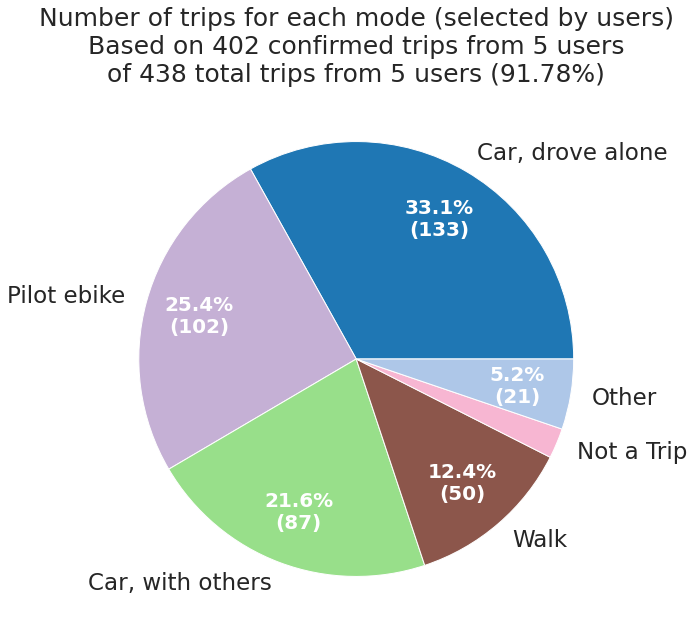

Car, drove alone    133
Pilot ebike         102
Car, with others     87
Walk                 50
Not a Trip            9
Bus                   8
Free Shuttle          4
Train                 3
Taxi/Uber/Lyft        2
Air                   2
Other                 2
Name: Mode_confirm, dtype: int64


In [16]:
labels_mc = expanded_ct['Mode_confirm'].value_counts(dropna=True).keys().tolist()
values_mc = expanded_ct['Mode_confirm'].value_counts(dropna=True).tolist()
plot_title= "Number of trips for each mode (selected by users)\n%s" % quality_text
file_name= 'ntrips_mode_confirm%s.png' % file_suffix
pie_chart_mode(plot_title,labels_mc,values_mc,file_name)
print(expanded_ct['Mode_confirm'].value_counts(dropna=True))

,vals,pct
Pilot ebike,32,58.181818
"Car, with others",11,20.000000
"Car, drove alone",9,16.363636
Bus,1,1.818182
Free Shuttle,1,1.818182
Not a Trip,1,1.818182


,vals,pct
Pilot ebike,32,58.181818
"Car, with others",11,20.000000
"Car, drove alone",9,16.363636


,vals,pct
Pilot ebike,32.0,58.181818
"Car, with others",11.0,20.000000
"Car, drove alone",9.0,16.363636
Other,3.0,5.454545


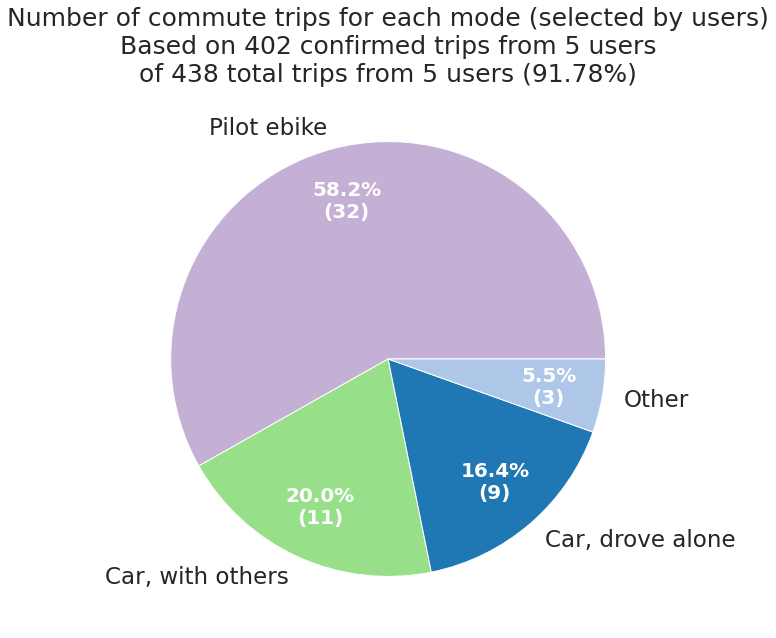

Pilot ebike         32
Car, with others    11
Car, drove alone     9
Bus                  1
Free Shuttle         1
Not a Trip           1
Name: Mode_confirm, dtype: int64


In [17]:
labels_mc = expanded_ct.query("Trip_purpose == 'Work'").Mode_confirm.value_counts(dropna=True).keys().tolist()
values_mc = expanded_ct.query("Trip_purpose == 'Work'").Mode_confirm.value_counts(dropna=True).tolist()
plot_title= "Number of commute trips for each mode (selected by users)\n%s" % quality_text
file_name= 'ntrips_commute_mode_confirm%s.png' % file_suffix
pie_chart_mode(plot_title,labels_mc,values_mc,file_name)
print(expanded_ct.query("Trip_purpose == 'Work'").Mode_confirm.value_counts(dropna=True))

# Distribution of Replace_Mode Attribute

,vals,pct
"Car, drove alone",196,48.756219
No Travel,117,29.104478
"Car, with others",28,6.965174
Walk,26,6.467662
Regular Bike,17,4.228856
Bus,16,3.980100
Pilot ebike,1,0.248756
Bikeshare,1,0.248756


,vals,pct
"Car, drove alone",196,48.756219
No Travel,117,29.104478
"Car, with others",28,6.965174
Walk,26,6.467662
Regular Bike,17,4.228856
Bus,16,3.980100


,vals,pct
"Car, drove alone",196.0,48.756219
No Travel,117.0,29.104478
"Car, with others",28.0,6.965174
Walk,26.0,6.467662
Regular Bike,17.0,4.228856
Bus,16.0,3.980100
Other,2.0,0.497512


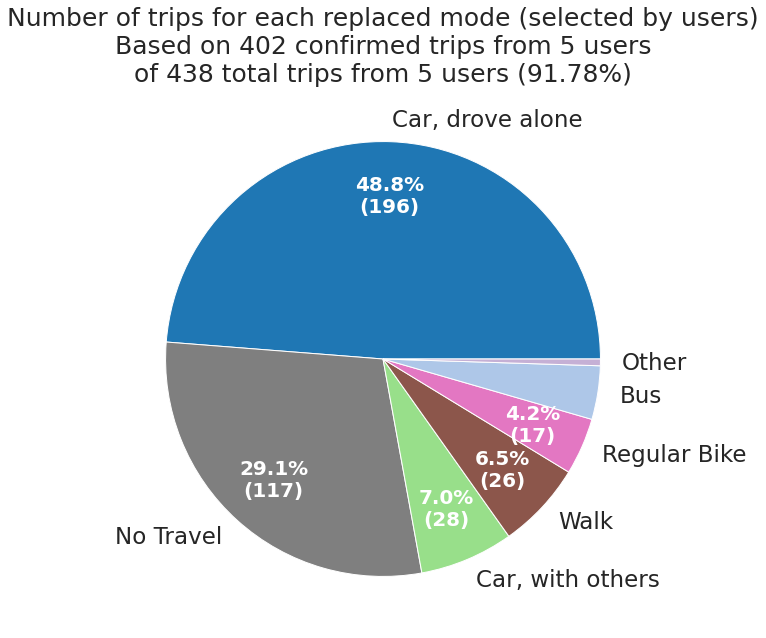

In [18]:
labels_rm = expanded_ct['Replaced_mode'].value_counts(dropna=True).keys().tolist()
values_rm = expanded_ct['Replaced_mode'].value_counts(dropna=True).tolist()
plot_title="Number of trips for each replaced mode (selected by users)\n%s" % quality_text
file_name= 'ntrips_replaced_mode%s.png' % file_suffix
pie_chart_mode(plot_title,labels_rm,values_rm,file_name)

### Note: The portion of pilot ebikes in the pie chart above is only when the mode_confirm is different that ebike. Example: mode_confirm was Walk, replaced_mode ebike. 
###           mode_confrim was Car, drove alone, replaced_mode ebike.

In [19]:
expanded_ct.loc[expanded_ct['Replaced_mode'] == 'Pilot ebike'].Mode_confirm.unique()

array(['Walk'], dtype=object)

# Distribution of Trip Purpose Attribute

,vals,pct
Other,104,25.870647
Home,85,21.144279
Entertainment/Social,58,14.427861
Work,55,13.681592
Recreation/Exercise,41,10.199005
Shopping,38,9.452736
Meal,12,2.985075
Transit transfer,6,1.492537
Personal/Medical,3,0.746269


,vals,pct
Other,104,25.870647
Home,85,21.144279
Entertainment/Social,58,14.427861
Work,55,13.681592
Recreation/Exercise,41,10.199005
Shopping,38,9.452736
Meal,12,2.985075


,vals,pct
Other,113.0,28.109453
Home,85.0,21.144279
Entertainment/Social,58.0,14.427861
Work,55.0,13.681592
Recreation/Exercise,41.0,10.199005
Shopping,38.0,9.452736
Meal,12.0,2.985075


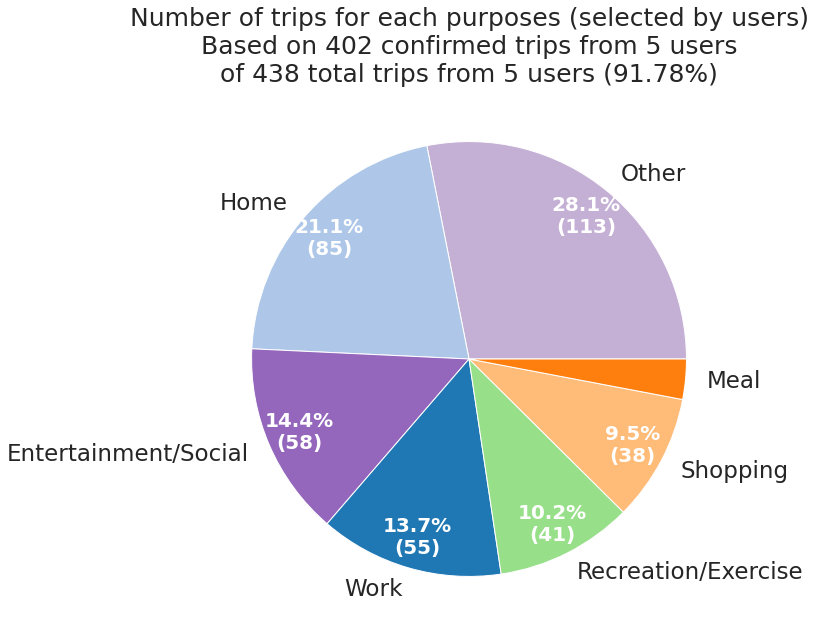

Other                   104
Home                     85
Entertainment/Social     58
Work                     55
Recreation/Exercise      41
Shopping                 38
Meal                     12
Transit transfer          6
Personal/Medical          3
Name: Trip_purpose, dtype: int64


In [20]:
labels_tp = expanded_ct['Trip_purpose'].value_counts(dropna=True).keys().tolist()
values_tp = expanded_ct['Trip_purpose'].value_counts(dropna=True).tolist()
plot_title="Number of trips for each purposes (selected by users)\n%s" % quality_text
file_name= 'ntrips_purpose%s.png' % file_suffix
pie_chart_purpose(plot_title,labels_tp,values_tp,file_name)
print(expanded_ct['Trip_purpose'].value_counts(dropna=True))

# Transport of Choice for Trips Under 10 Miles

,vals,pct
"Car, drove alone",108,31.952663
Pilot ebike,102,30.177515
"Car, with others",62,18.343195
Walk,49,14.497041
Not a Trip,8,2.366864
Bus,5,1.479290
Other,2,0.591716
Taxi/Uber/Lyft,1,0.295858
Free Shuttle,1,0.295858


,vals,pct
"Car, drove alone",108,31.952663
Pilot ebike,102,30.177515
"Car, with others",62,18.343195
Walk,49,14.497041
Not a Trip,8,2.366864


,vals,pct
"Car, drove alone",108.0,31.952663
Pilot ebike,102.0,30.177515
"Car, with others",62.0,18.343195
Walk,49.0,14.497041
Not a Trip,8.0,2.366864
Other,9.0,2.662722


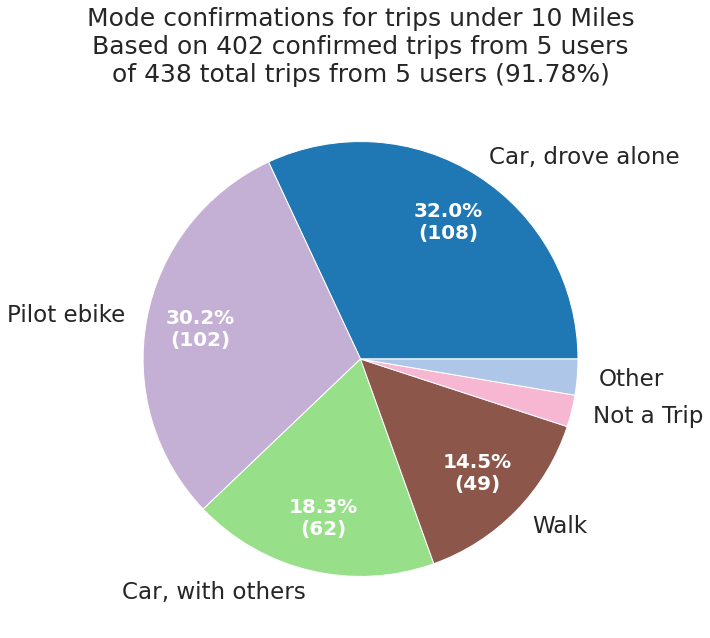

Car, drove alone    108
Pilot ebike         102
Car, with others     62
Walk                 49
Not a Trip            8
Bus                   5
Other                 2
Taxi/Uber/Lyft        1
Free Shuttle          1
Name: Mode_confirm, dtype: int64


In [21]:
labels_d10 = expanded_ct.loc[(expanded_ct['distance_miles'] <= 10)].Mode_confirm.value_counts(dropna=True).keys().tolist()
values_d10 = expanded_ct.loc[(expanded_ct['distance_miles'] <= 10)].Mode_confirm.value_counts(dropna=True).tolist()
plot_title="Mode confirmations for trips under 10 Miles\n%s" % quality_text
file_name ='ntrips_under10miles_mode_confirm%s.png' % file_suffix
pie_chart_mode(plot_title,labels_d10,values_d10,file_name)
print(expanded_ct.loc[(expanded_ct['distance_miles'] <= 10)].Mode_confirm.value_counts(dropna=True))

# Miles per transport mode selected (Mode_confirm)

,vals,pct
Air,3246.195853,53.683403
"Car, with others",1351.842477,22.355861
"Car, drove alone",796.487861,13.171780
Pilot ebike,232.170947,3.839487
Bus,159.370823,2.635567
Walk,96.436828,1.594807
Train,52.933765,0.875383
Free Shuttle,43.872578,0.725535
Taxi/Uber/Lyft,40.071947,0.662683
Not a Trip,19.796458,0.327381


,vals,pct
Air,3246.195853,53.683403
"Car, with others",1351.842477,22.355861
"Car, drove alone",796.487861,13.171780
Pilot ebike,232.170947,3.839487
Bus,159.370823,2.635567


,vals,pct
Air,3246.195853,53.683403
"Car, with others",1351.842477,22.355861
"Car, drove alone",796.487861,13.171780
Pilot ebike,232.170947,3.839487
Bus,159.370823,2.635567
Other,260.858399,4.313901


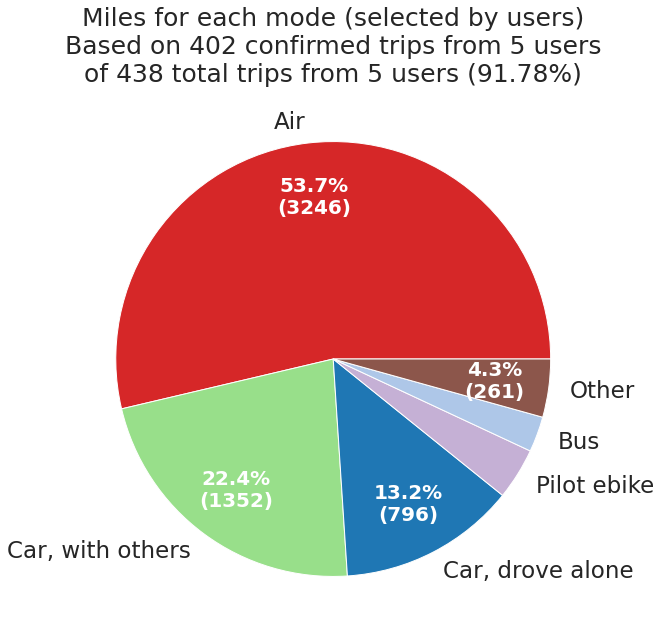

        Mode_confirm  Total (miles)  Count  Average (miles)
0                Air    3246.195853      2      1623.097926
3   Car, with others    1351.842477     87        15.538419
2   Car, drove alone     796.487861    133         5.988631
7        Pilot ebike     232.170947    102         2.276186
1                Bus     159.370823      8        19.921353
10              Walk      96.436828     50         1.928737
9              Train      52.933765      3        17.644588
4       Free Shuttle      43.872578      4        10.968144
8     Taxi/Uber/Lyft      40.071947      2        20.035974
5         Not a Trip      19.796458      9         2.199606
6              Other       7.746823      2         3.873411


In [22]:
miles = expanded_ct.groupby('Mode_confirm').agg({'distance_miles': ['sum', 'count' , 'mean']})
miles.columns = ['Total (miles)', 'Count', 'Average (miles)']
miles = miles.reset_index()
miles =miles.sort_values(by=['Total (miles)'], ascending=False)

#data
miles_dict = dict(zip(miles['Mode_confirm'], miles['Total (miles)']))

labels_m = []
values_m = []

for x, y in miles_dict.items():
    labels_m.append(x)
    values_m.append(y)

plot_title="Miles for each mode (selected by users)\n%s" % quality_text
file_name ='miles_mode_confirm%s.png' % file_suffix
pie_chart_mode(plot_title,labels_m,values_m,file_name)
print(miles)

# Average Miles per transport mode selected (Mode_confirm)

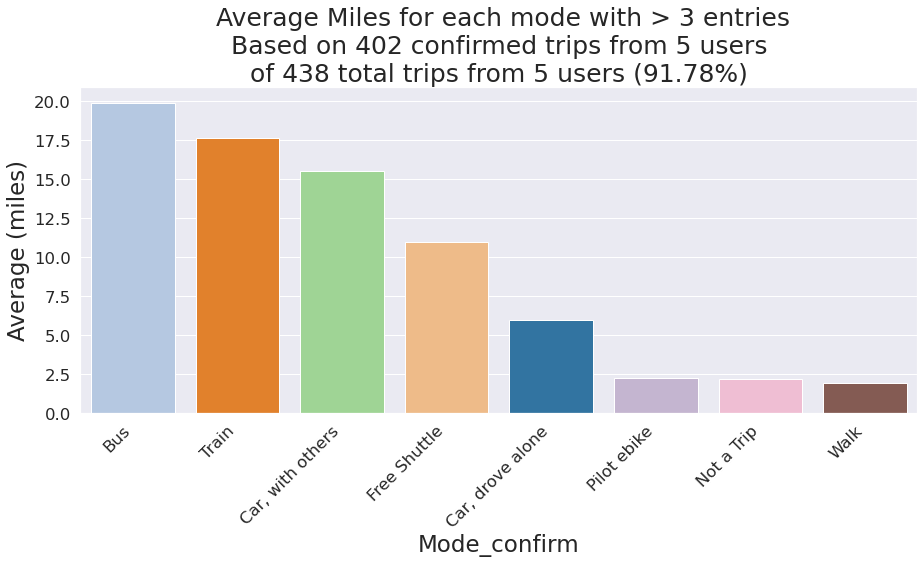

In [23]:
data = miles.drop((miles.query("Count < 3").index)).sort_values(by=['Average (miles)'], ascending=False)
x='Mode_confirm'
y='Average (miles)'

plot_title=" Average Miles for each mode with > 3 entries\n%s" % quality_text
file_name ='average_miles_mode_confirm%s.png' % file_suffix

barplot_mode(data,x,y,plot_title,file_name)

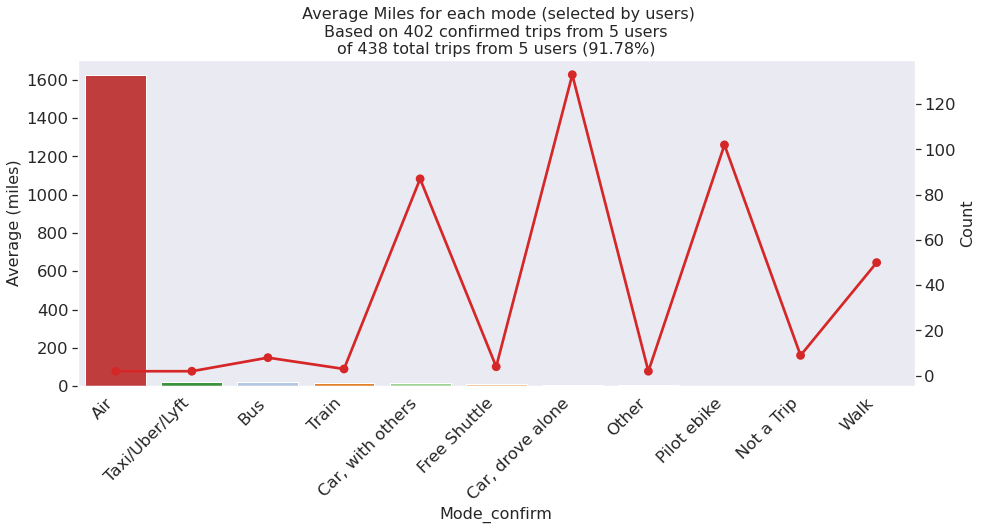

In [24]:
data = miles.sort_values(by=['Average (miles)'], ascending=False)
x='Mode_confirm'
y='Average (miles)'
y2 = "Count"

plot_title=" Average Miles for each mode (selected by users)\n%s" % quality_text
file_name ='average_miles_mode_confirm2%s.png' % file_suffix

barplot_mode2(data,x,y,y2,plot_title,file_name)

# Number of Trips by Day¶

In [25]:
fq_days = expanded_ct.groupby(['start_local_dt_day']).agg({'start_local_dt_day': ['sum', 'count']})
fq_days = fq_days.reset_index()
fq_days.columns = ['Day of the Month', 'Total', 'Number of Trips']
fq_days

,Day of the Month,Total,Number of Trips
0,1,26,26
1,2,42,21
2,3,36,12
3,4,84,21
4,5,100,20
5,6,156,26
6,7,189,27
7,8,96,12
8,9,81,9
9,10,180,18


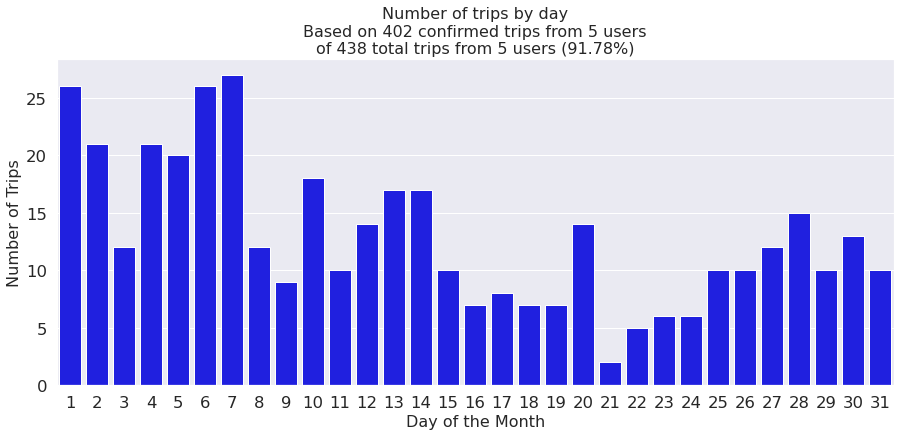

In [26]:
data = fq_days
x = 'Day of the Month'
y = 'Number of Trips'

plot_title="Number of trips by day\n%s" % quality_text
file_name ='ntrips_per_day%s.png' % file_suffix

barplot_day(data,x,y,plot_title,file_name)

# Number of Trips by day of week¶

In [27]:
fq_weekdays = expanded_ct.groupby(['start_local_dt_weekday']).agg({'start_local_dt_weekday': ['sum', 'count']})
fq_weekdays = fq_weekdays.reset_index()
fq_weekdays.columns = ['Weekday', 'Total', 'Number of Trips']
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
fq_weekdays["Weekday"] = fq_weekdays.Weekday.apply(lambda x: weekday_labels[x])
fq_weekdays

,Weekday,Total,Number of Trips
0,Mon,0,48
1,Tue,51,51
2,Wed,138,69
3,Thu,183,61
4,Fri,252,63
5,Sat,280,56
6,Sun,324,54


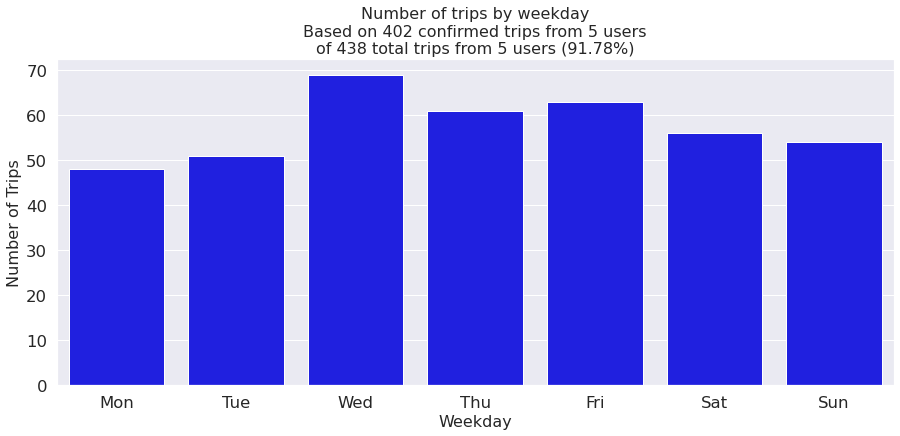

In [28]:
data = fq_weekdays
x = 'Weekday'
y = 'Number of Trips'

plot_title="Number of trips by weekday\n%s" % quality_text
file_name ='ntrips_per_weekday%s.png' % file_suffix

barplot_day(data,x,y,plot_title,file_name)